********
## N-dimensional Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from chainconsumer import ChainConsumer

In [2]:
df_original = pd.read_csv('../data/Diabetes.csv')
df_original

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
cols = [c for c in df_original.columns if c not in ['Pregnancies', 'Outcome']]
df = df_original.copy()
df[cols] = df[cols].replace({0: np.NaN})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Scatter Matrix

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


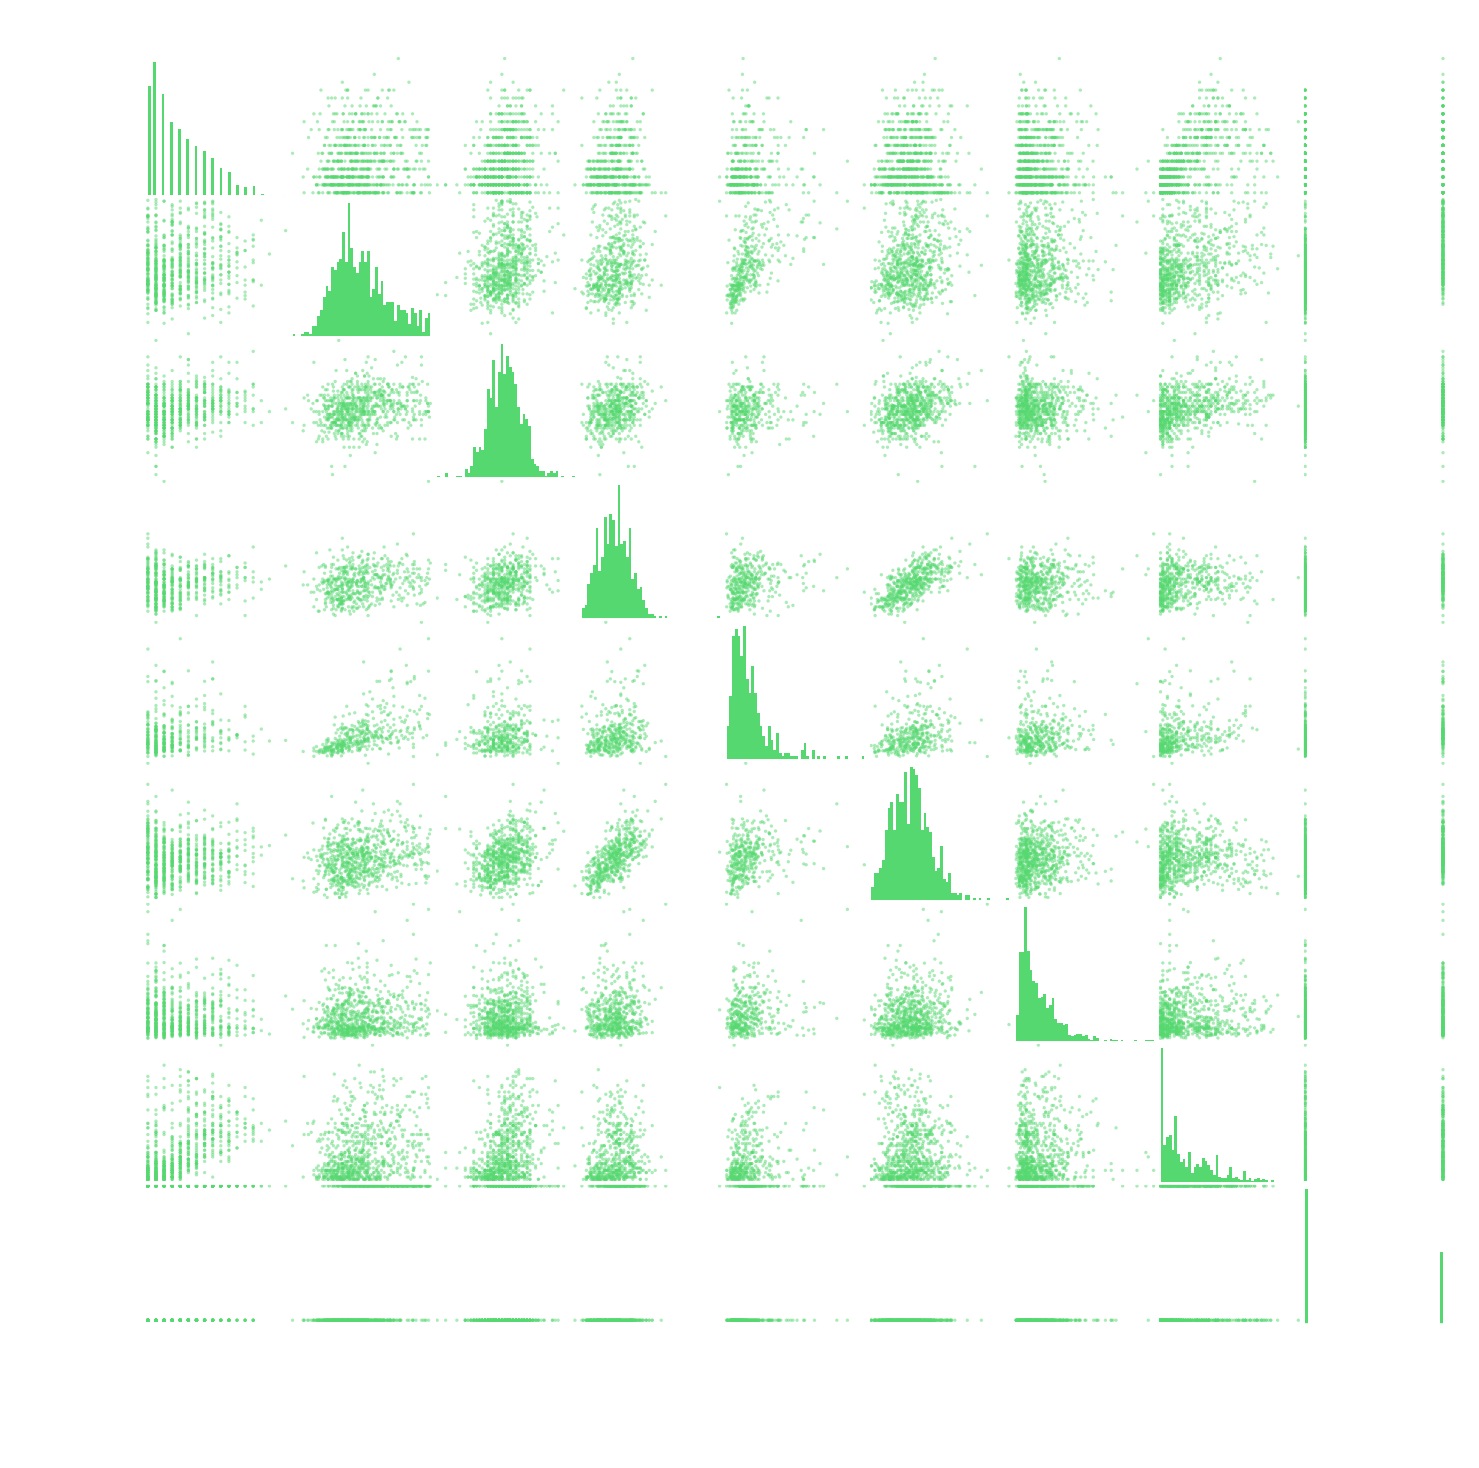

In [7]:
pd.plotting.scatter_matrix(df, figsize=(7,7));

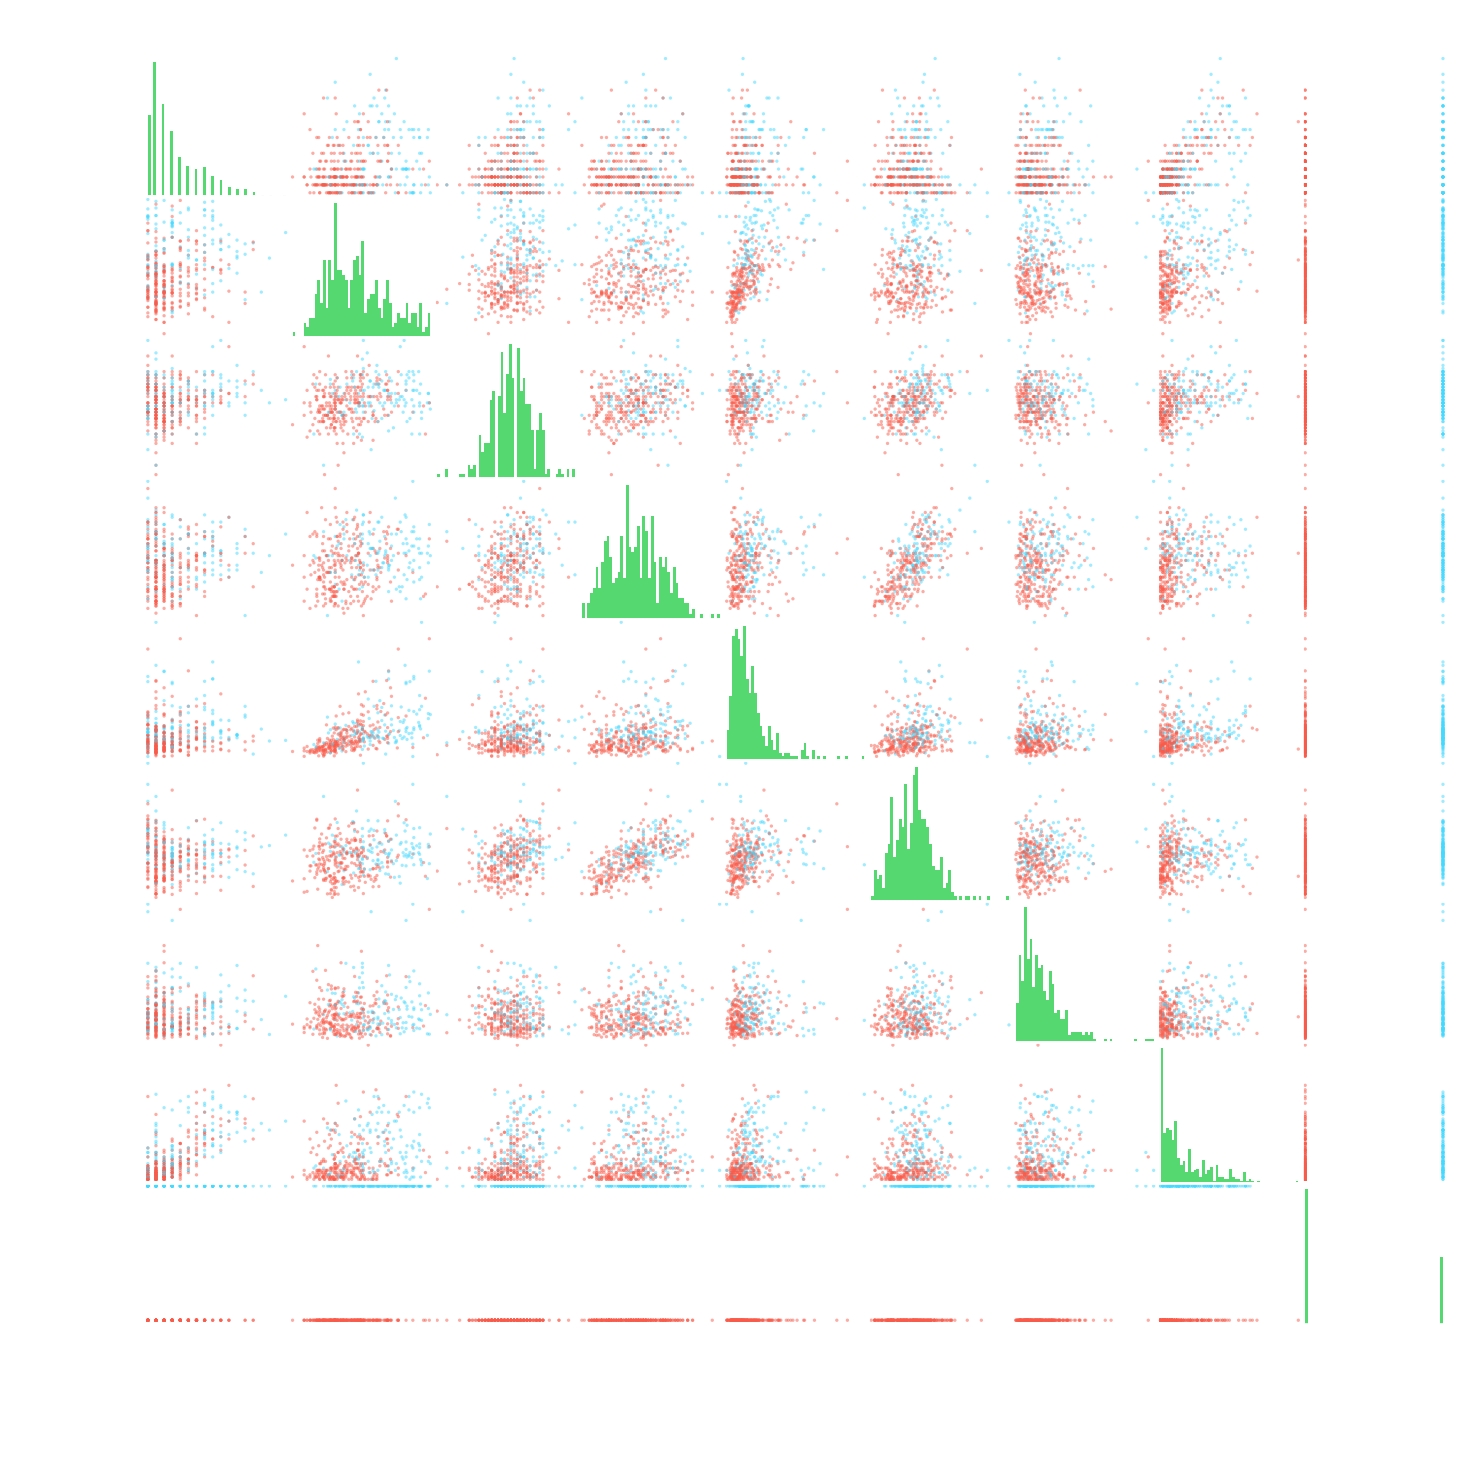

In [8]:
df2 = df.dropna()
# If Outcome is 1 == blue, if outcome is 0 == red;
colors = df2['Outcome'].map(lambda x: "#44d9ff" if x else "#f95b4a")

pd.plotting.scatter_matrix(df2, figsize=(7,7), color=colors);
# What matter in this analysis is to figure out the correlation of 2 different variables and how they
# affect each other;

********
# Correlation Plots

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


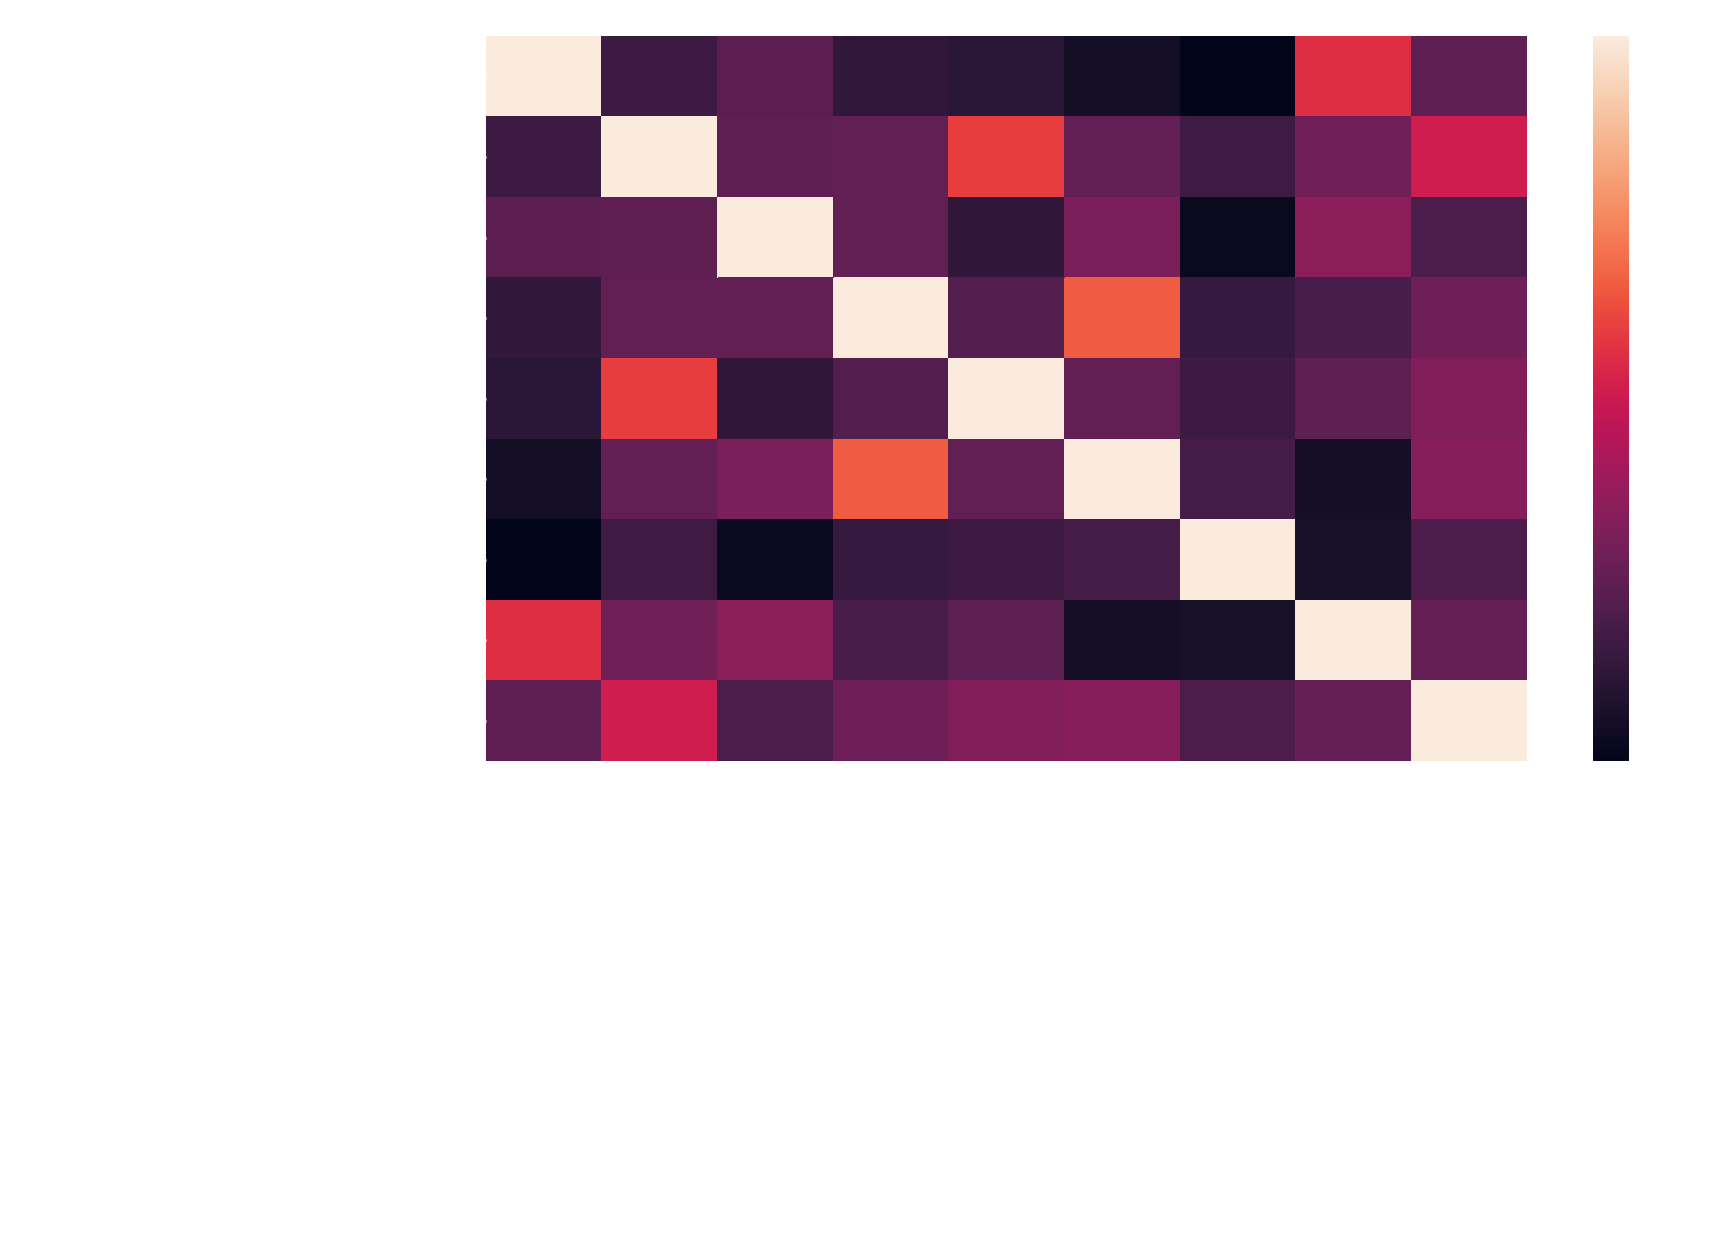

In [10]:
sb.heatmap(df.corr());

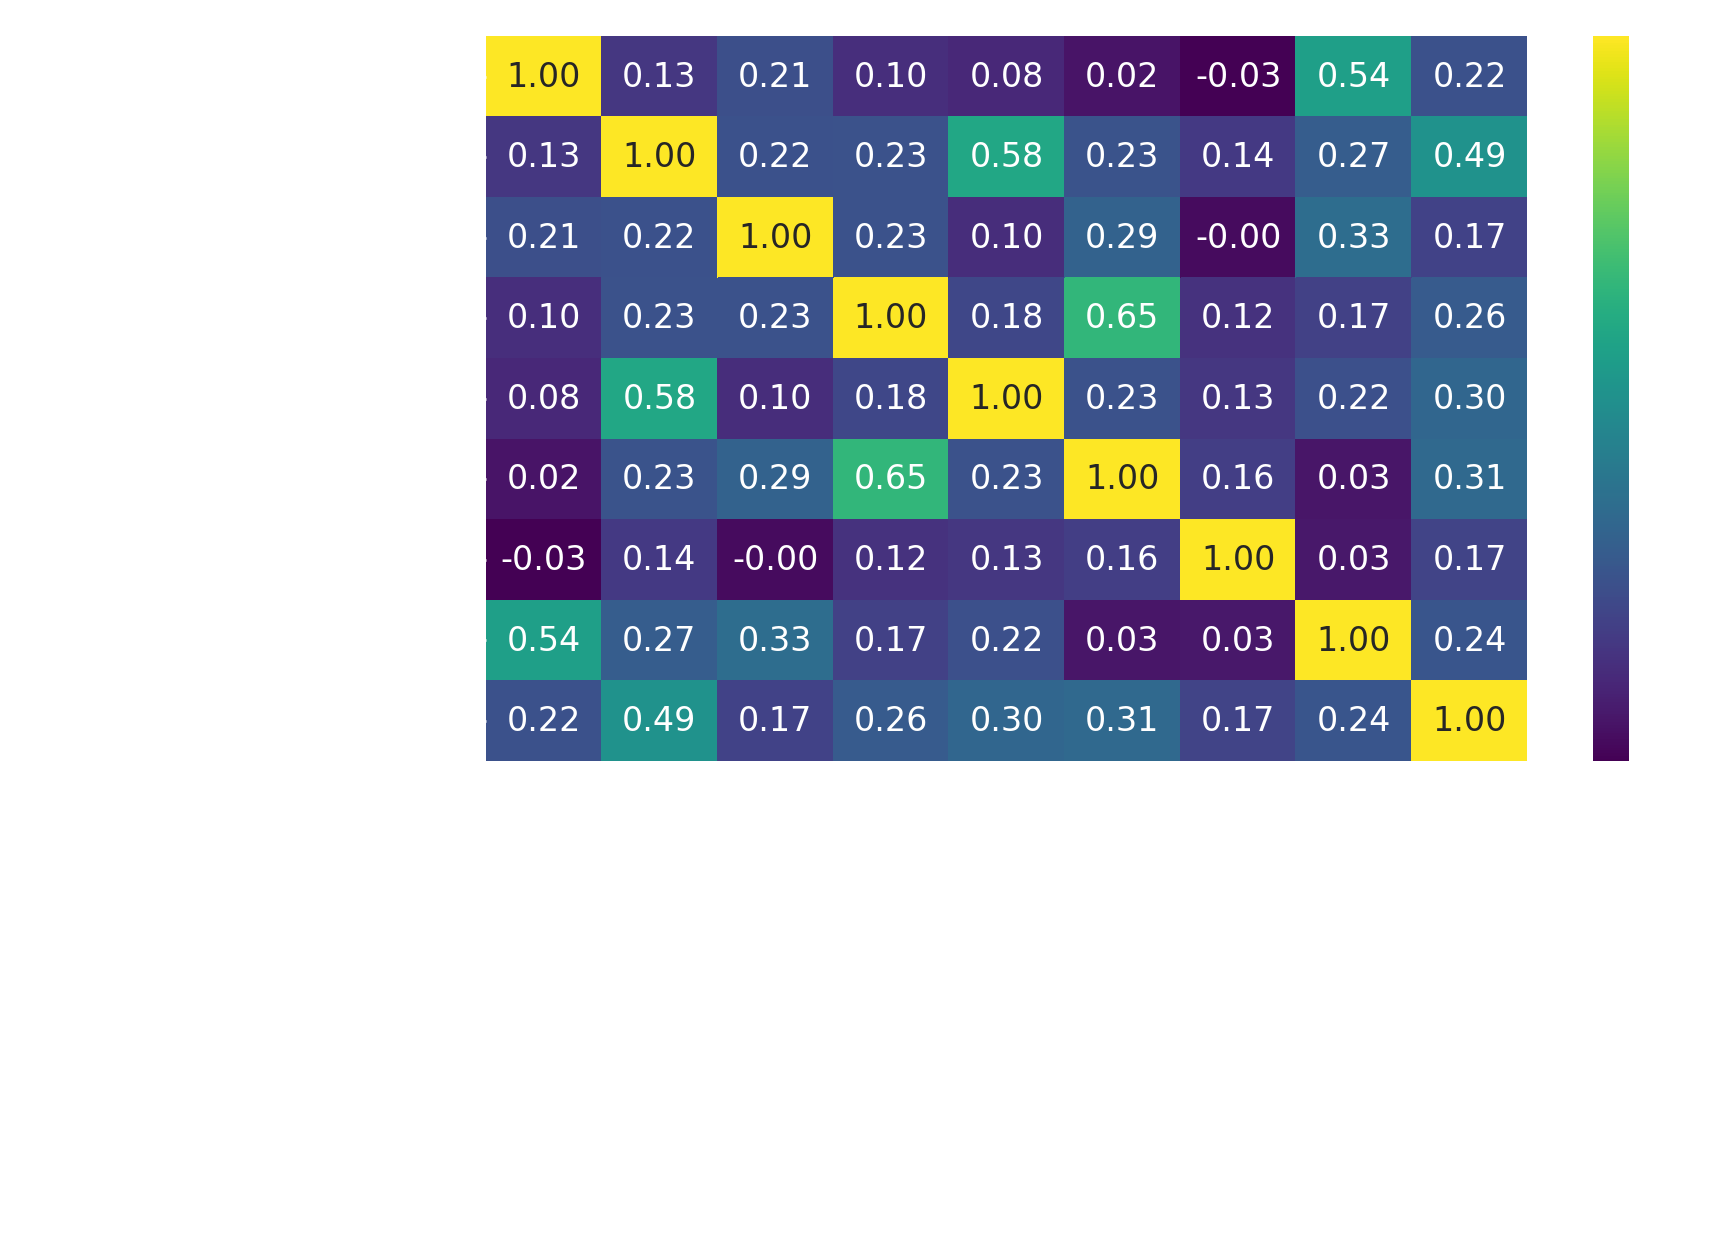

In [11]:
sb.heatmap(df.corr(), annot=True, cmap='viridis', fmt='0.2f');

## 2D Histograms
Large datasets

In [12]:
df2 = pd.read_csv('../data/height_weight.csv')
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     4231 non-null   int64  
 1   height  4231 non-null   float64
 2   weight  4231 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 99.3 KB


,sex,height,weight
count,4231.000000,4231.000000,4231.000000
mean,1.540061,66.903607,174.095122
std,0.498451,4.313004,38.896171
min,1.000000,55.400000,96.590000
25%,1.000000,63.730000,144.315000
50%,2.000000,66.630000,170.100000
75%,2.000000,69.970000,198.660000
max,2.000000,79.610000,298.440000


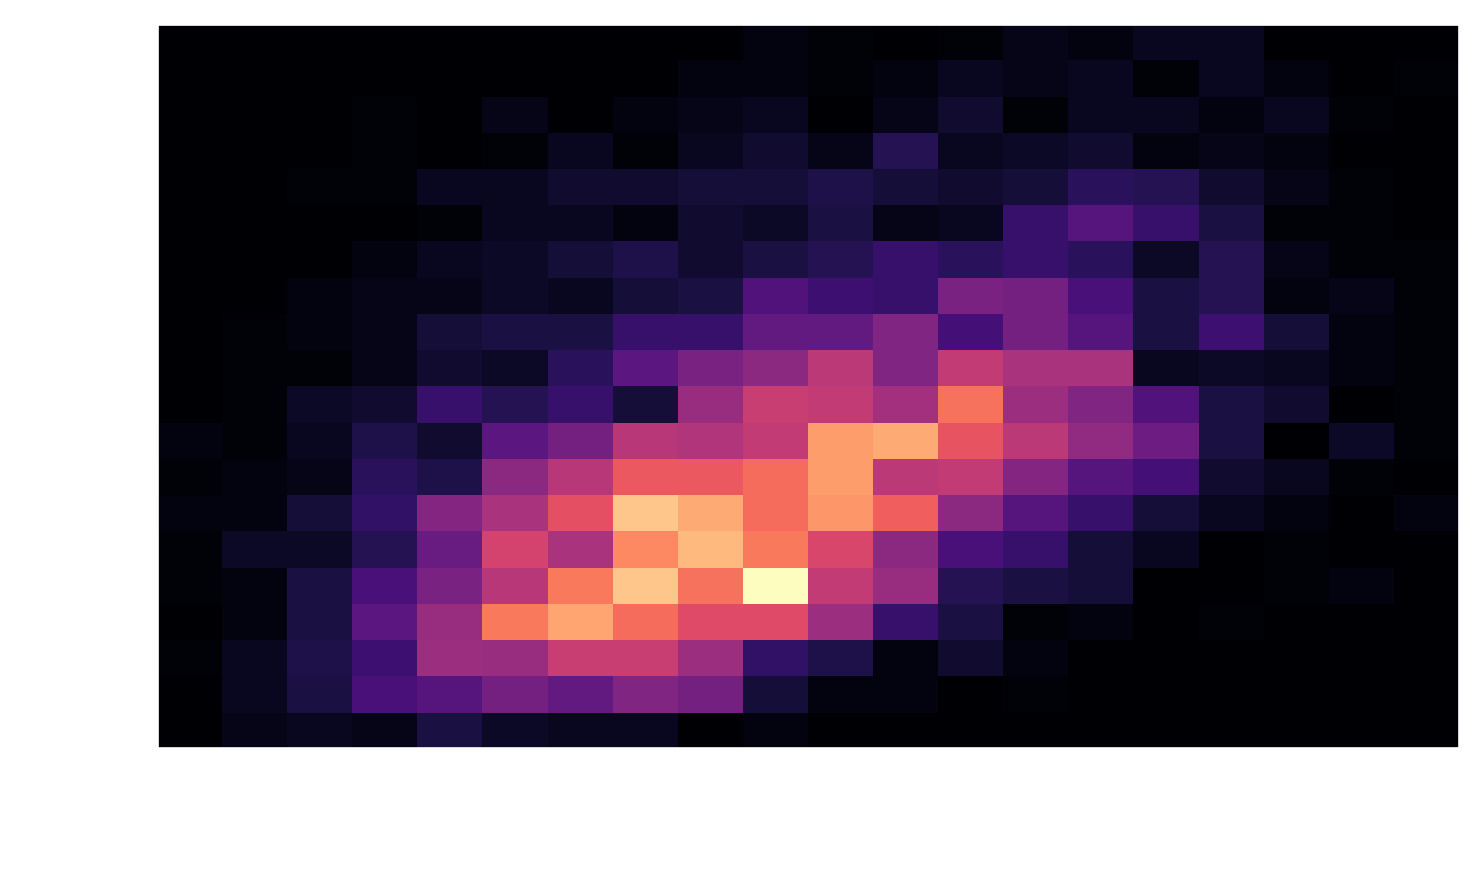

In [13]:
plt.hist2d(df2['height'], df2['weight'], bins=20, cmap="magma")
plt.xlabel('Height')
plt.ylabel('Weight');
# Positive correlation; height vs weight

## Contour plots

In [14]:
df2

,sex,height,weight
0,1,71.74,259.88
1,1,71.00,186.73
2,2,63.83,172.17
3,1,67.74,174.66
4,2,67.28,169.20
...,...,...,...
4226,2,65.19,114.68
4227,1,67.30,183.39
4228,2,63.69,167.53
4229,2,62.66,136.99


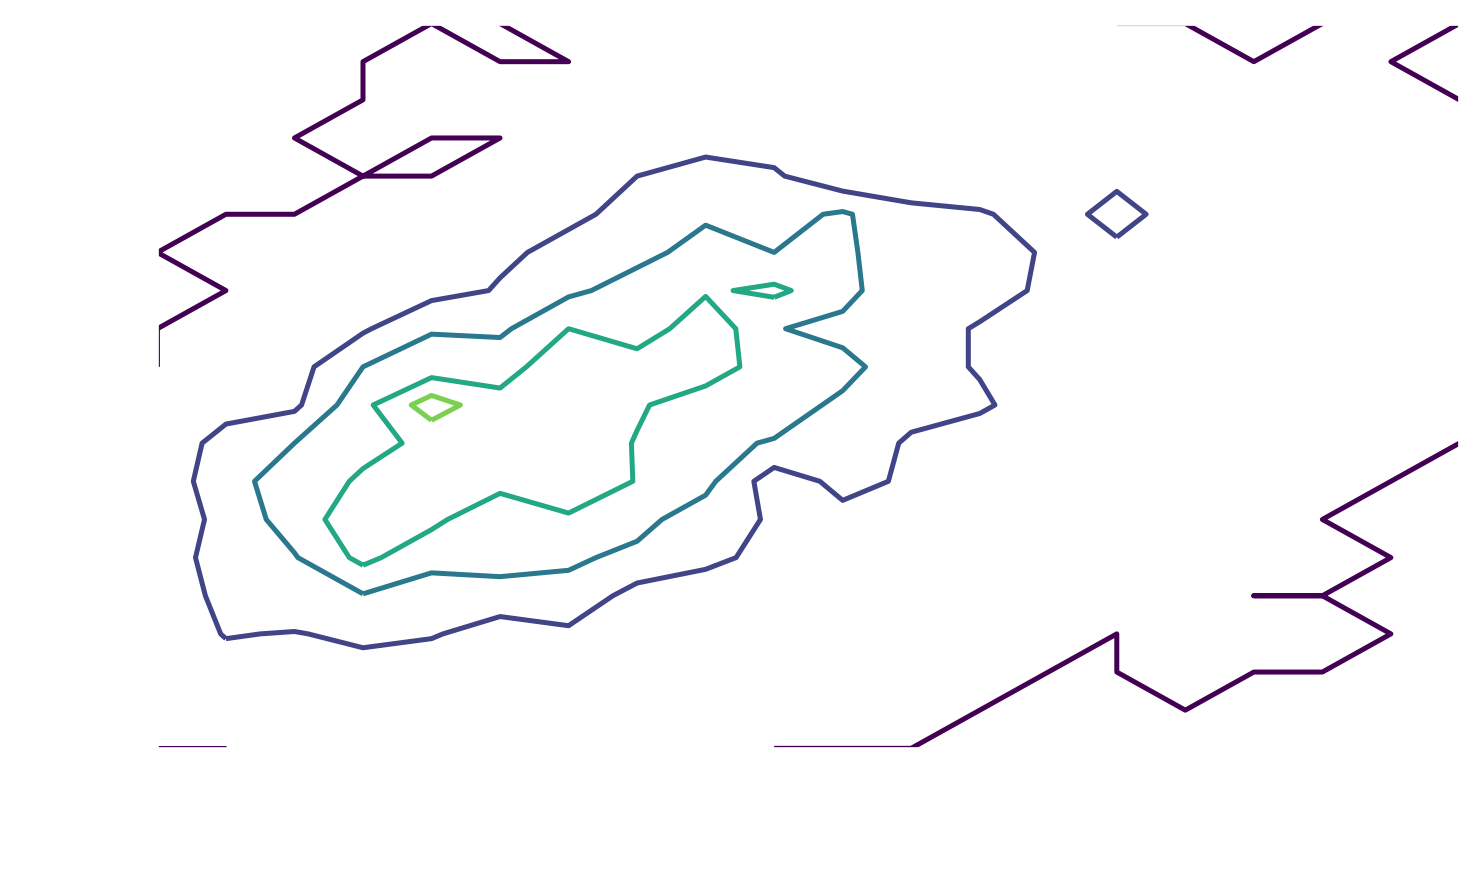

In [15]:
hist, x_edge, y_edge = np.histogram2d(df2['height'], df2['weight'], bins=20)
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])

# everything inside of the circular reference has 10 points in it
plt.contour(x_center, y_center, hist, levels=4) # level 4 means 4 surfaces == 5 lines

plt.xlabel('Height')
plt.ylabel('Weight');

## KDE Plots -> Kernel Density Estimations
The way we can smooth the data that is too noise, ourselves -> Kernel is specifying how you smooth your data in this case is going to be a gaussian kernel;

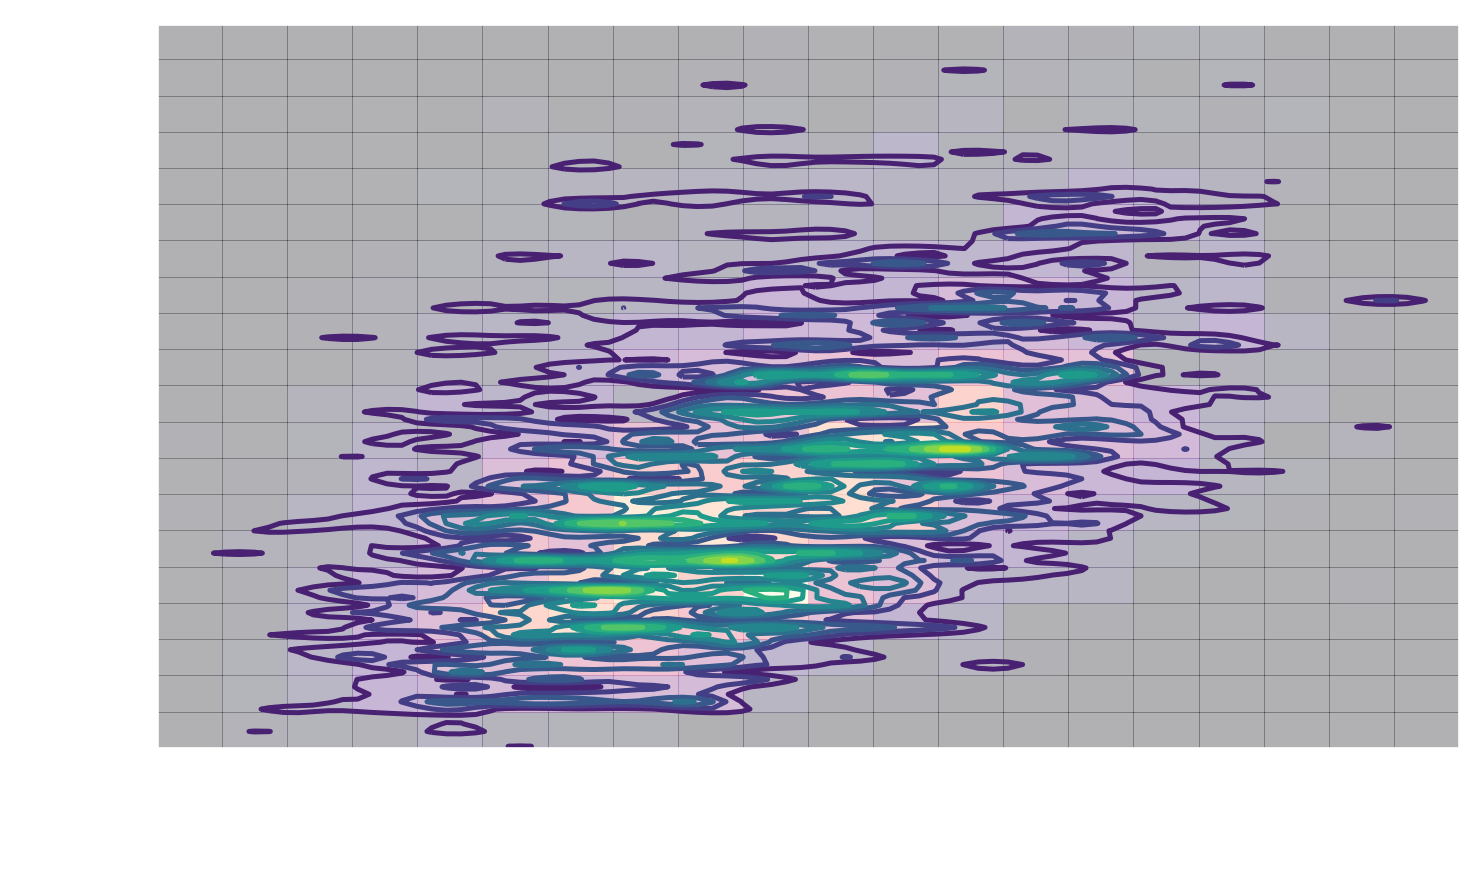

In [16]:
sb.kdeplot(df2['height'], df2['weight'], cmap='viridis', bw=0.5);
plt.hist2d(df2['height'], df2['weight'], bins=20, cmap="magma", alpha=0.3);

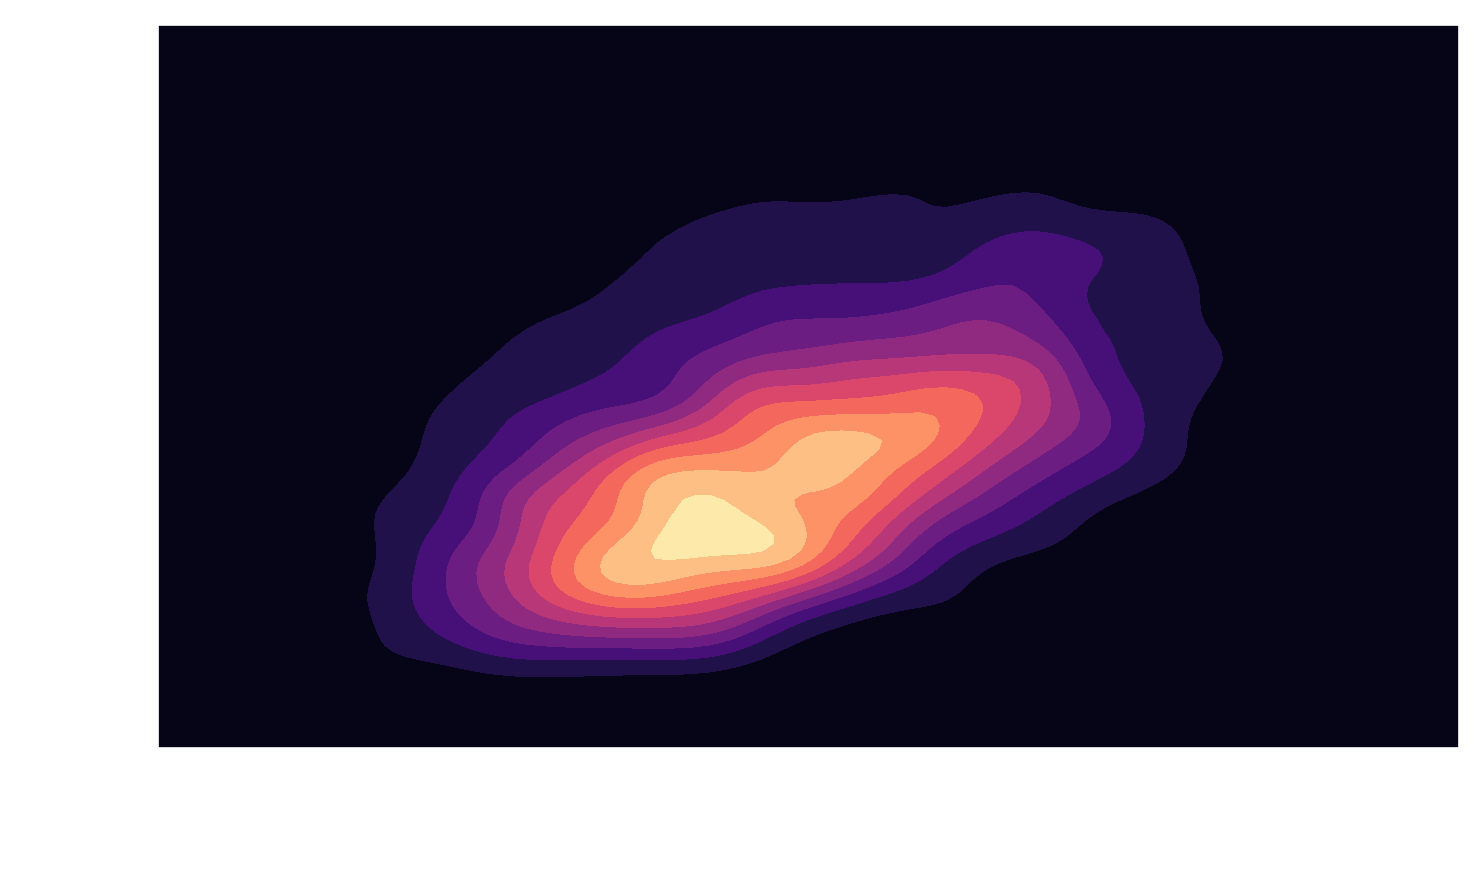

In [17]:
sb.kdeplot(df2['height'], df2['weight'], cmap='magma', shade=True);

## In Defense of Simplicity

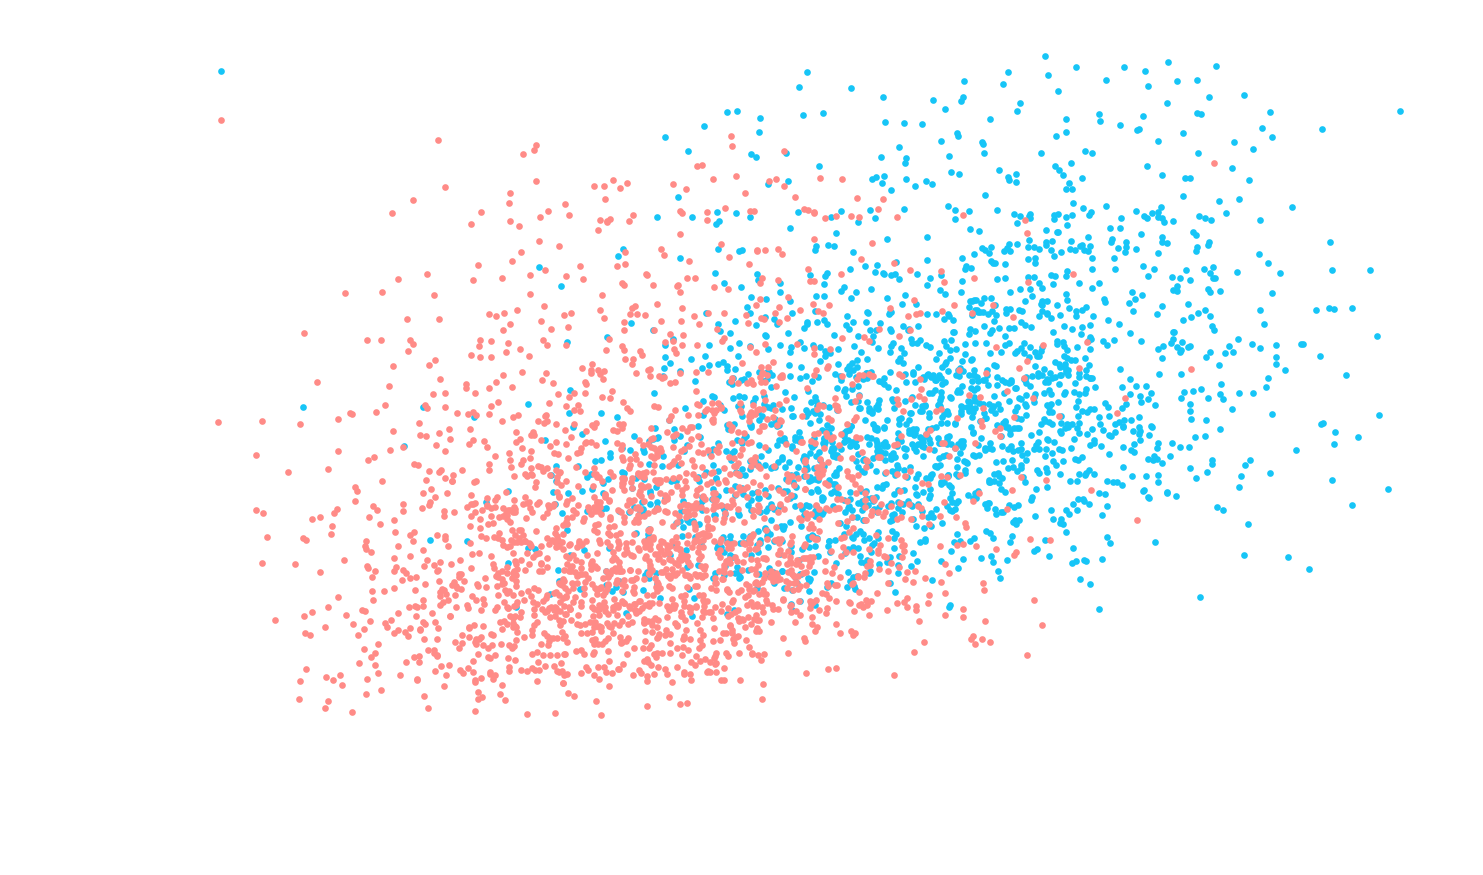

In [18]:
m = df2['sex'] == 1
plt.scatter(df2.loc[m, 'height'], df2.loc[m, 'weight'], c='#16c5f7', s=1, label='Male')
plt.scatter(df2.loc[~m, 'height'], df2.loc[~m, 'weight'], c='#ff8b87', s=1, label='Female')
plt.xlabel('Height')
plt.ylabel('Weight');
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.legend();

## Treating points with probability
Using the library ChainConsumer (examples here). I wrote it, as I deal with MCMC chains and posterior samples for hours eveyrday and needed better tools to analyse them.

In [19]:
params = ['height', 'weight']
male = df2.loc[m, params].values
female = df2.loc[~m, params].values
male.shape

(1946, 2)

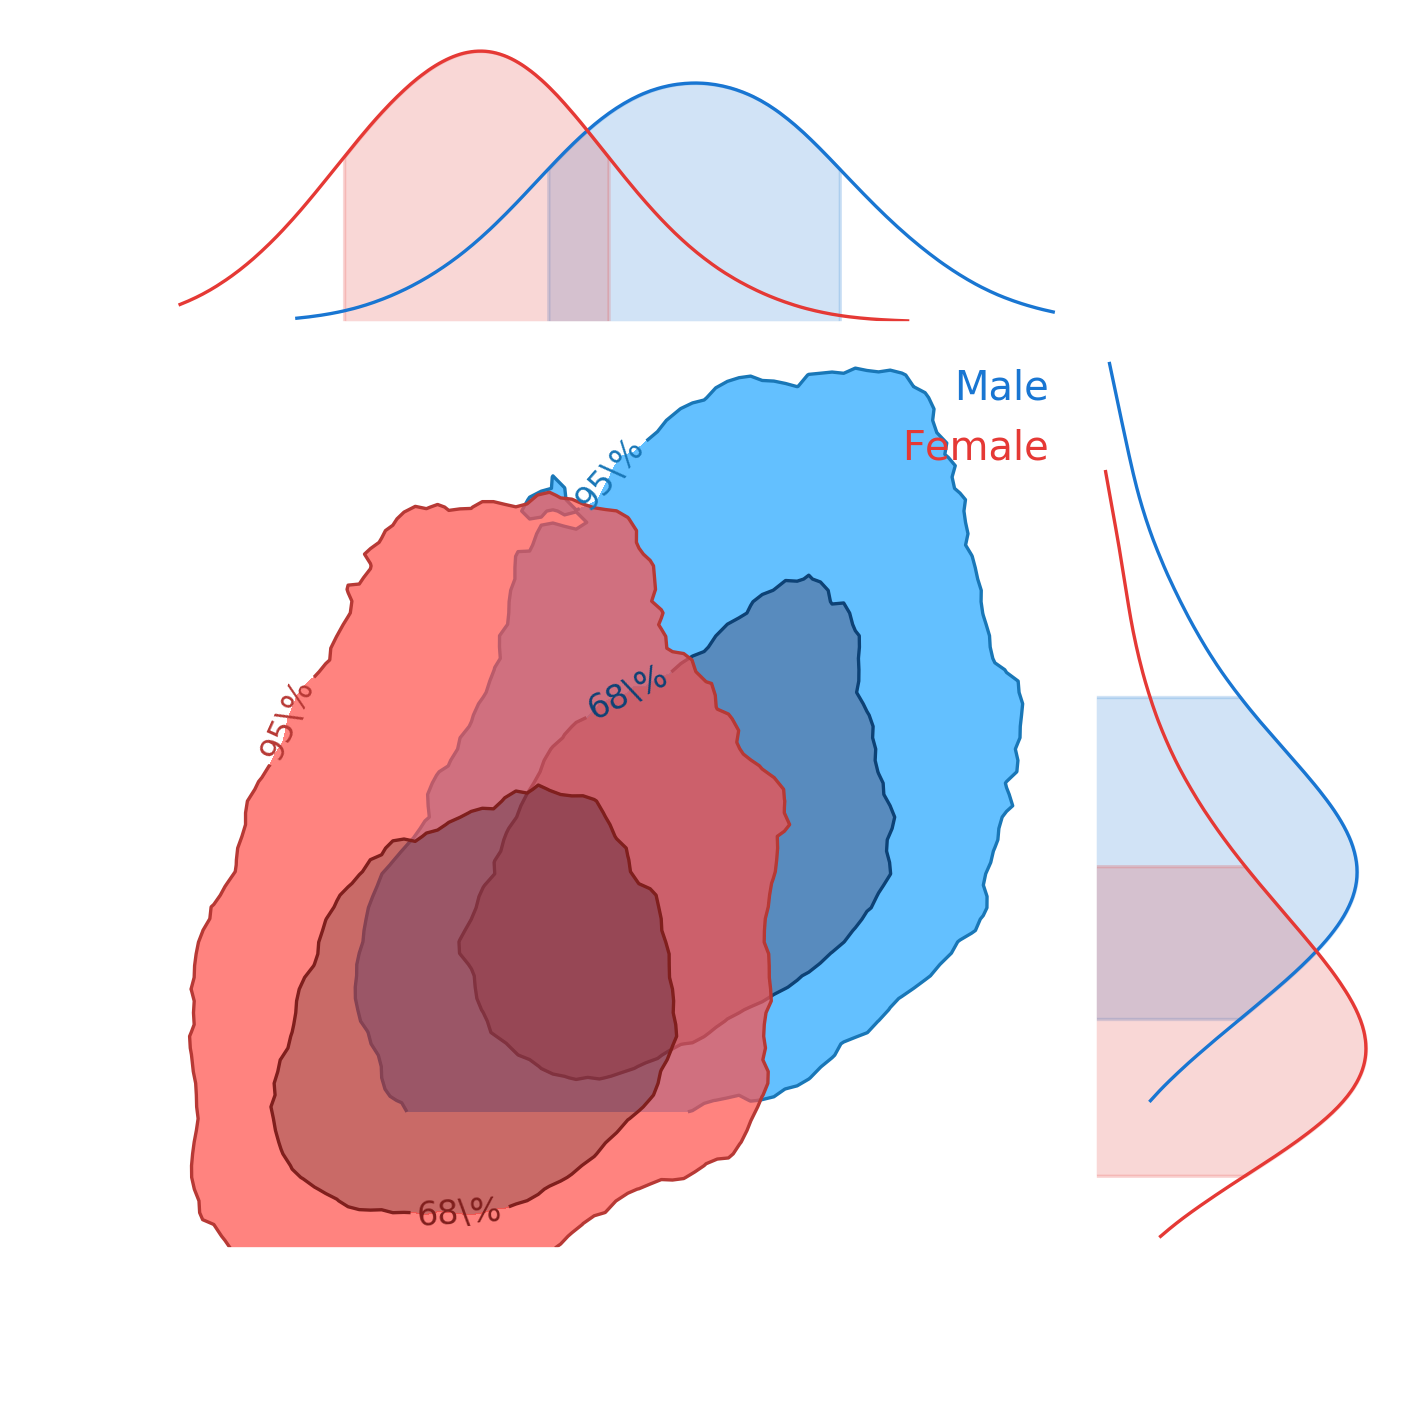

In [22]:
c = ChainConsumer()
c.add_chain(male, parameters=params, name='Male', kde=1.0, color='b')
c.add_chain(female, parameters=params, name='Female', kde=1.0, color='r')
c.configure(contour_labels='confidence',usetex=False, serif=False)
c.plotter.plot(figsize=2.0);

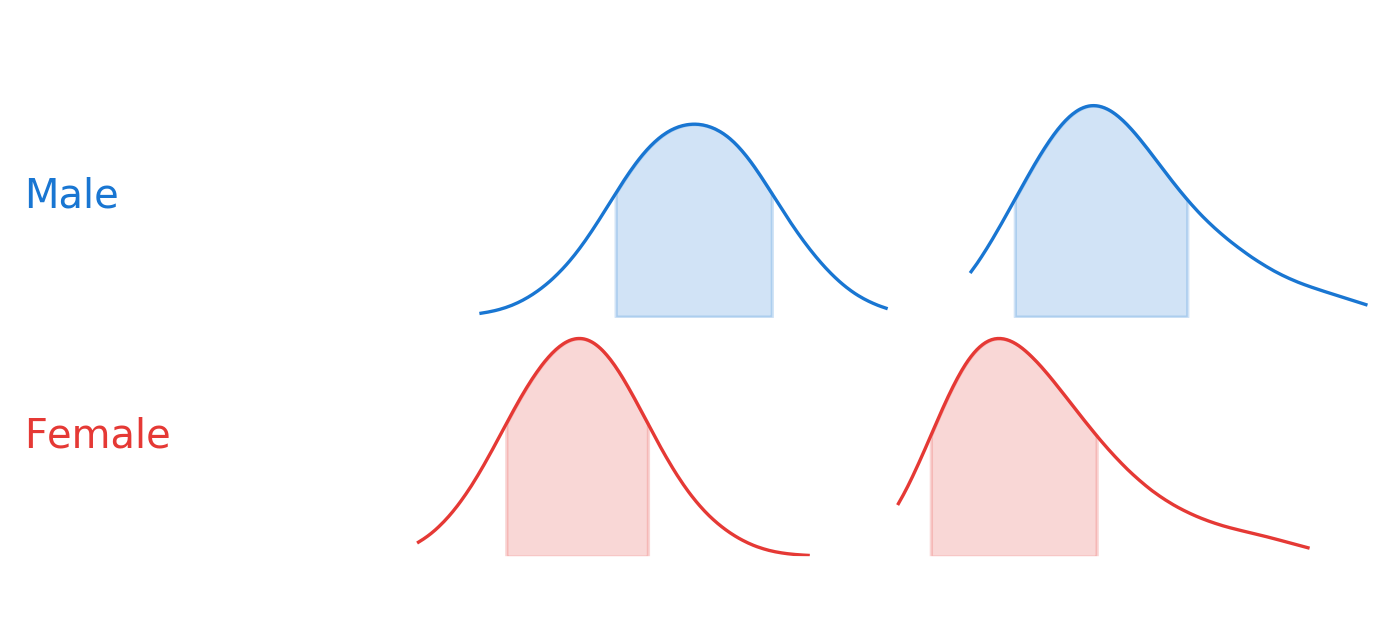

In [23]:
# Compare different models outputs the same time;
c.plotter.plot_summary(figsize=2.0);